In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
inputs = df.drop("salary_more_then_100k", axis = 'columns')
target = df['salary_more_then_100k']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [9]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [10]:
input_n = inputs.drop(['company','job','degree'], axis = 'columns')

In [11]:
input_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(input_n,target, test_size = 0.2)

In [14]:
len(x_train)

12

In [15]:
len(x_test)

4

In [16]:
from sklearn import tree

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(x_test,y_test)

0.75

In [20]:
pred = model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2, 0],
       [1, 1]], dtype=int64)

In [24]:
import matplotlib.pyplot as plt
import seaborn as snb

Text(95.72222222222221, 0.5, 'truth')

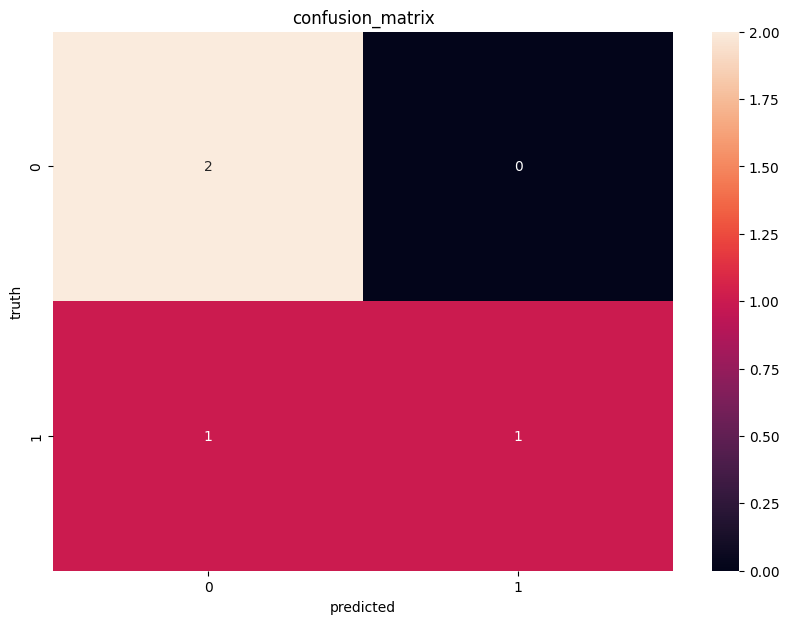

In [27]:
plt.figure(figsize = (10,7))
snb.heatmap(cm, annot = True)
plt.title('confusion_matrix')
plt.xlabel('predicted')
plt.ylabel('truth')